In [182]:
# Import packages and load data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r'zenodo_humss_datasets.csv')
# df.head()

In [183]:
# Remove outliers
outlier_max = 10000         # Set the outlier threshold (max)
outlier_min = 1             # Set the outlier threshold (min)
df  = df.loc[(df['views'] <= outlier_max) \
    & (df['downloads'] <= outlier_max) & (df['downloads'] >= outlier_min) \
    & (df['downloads'] >= outlier_min)]                    

In [184]:
# Replace downloads and views with time-normalised data
# Skip this cell if you want to work with total counts
df['downloads'] = df['downloads']/df['days_since_publication']
df['views'] = df['views']/df['days_since_publication']
# df.head()

In [185]:
# Create dataframe with daily averages and remove outliers
days_since_publication = df['days_since_publication'].unique()
views = []
downloads = []
for day in days_since_publication:
    mean_views = df['views'][df['days_since_publication'] == day].mean()
    mean_downloads = df['downloads'][df['days_since_publication'] == day].mean()
    views.append(mean_views)
    downloads.append(mean_downloads)
df_means = pd.DataFrame({'days_since_publication': days_since_publication, \
    'mean_views': views, 'mean_downloads': downloads})
# df_means.head()

In [186]:
# Create dataframe with 90-day averages
interval = 90           # Set the length of the interval period in days
max_days = df_means['days_since_publication'].max()
periods = np.array(range(1,(round(max_days/interval)+2)))*interval
p_views = []
p_downloads = []
df_p = df_means         # Create a copy that we could work with

for period in periods:
    mean_p_views = df_p['mean_views'][df_p['days_since_publication'] <= period].mean()
    mean_p_downloads = df_p['mean_downloads'][df_p['days_since_publication'] <= period].mean()
    indices = df_p.index[df_p['days_since_publication'] <= period].tolist()
    p_views.append(mean_p_views)
    p_downloads.append(mean_p_downloads)
    df_p = df_p.drop(indices)
df_means_period = pd.DataFrame({'less_than_n_days_since_publication': periods, \
    'monthly_mean_views': p_views, 'monthly_mean_downloads': p_downloads})
df_means_period = df_means_period.sort_values(by='less_than_n_days_since_publication', ascending=False)
# df_means_period.head()

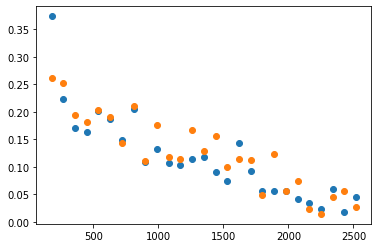

In [187]:
# Plot 90-day averages for views and downloads
# Views
x = np.array(df_means_period['less_than_n_days_since_publication'])
y = np.array(df_means_period['monthly_mean_views'])
plt.scatter(x,y)

# Downlaods
x = np.array(df_means_period['less_than_n_days_since_publication'])
y = np.array(df_means_period['monthly_mean_downloads'])
plt.scatter(x,y)

plt.show()